In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.Age=data['Age'].fillna(data['Age'].median())

In [8]:
data['Died']=1-data['Survived']

In [9]:
data.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died
Sex,,,,,,,,
female,135343,233,678,8770.00,218,204,13966.6628,81
male,262043,109,1379,17391.17,248,136,14727.2865,468


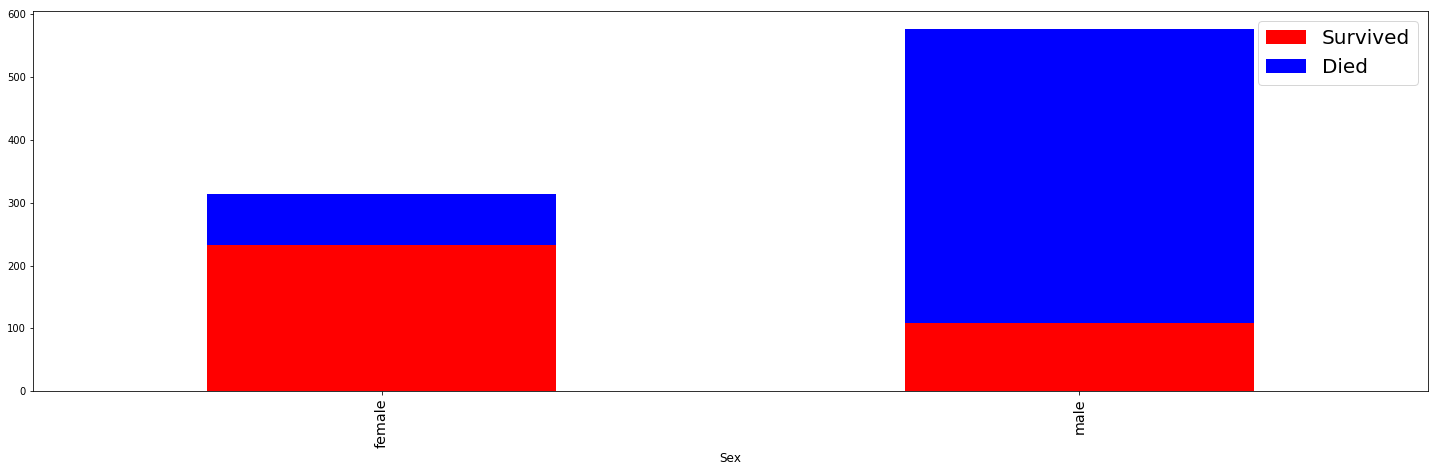

In [14]:
data.groupby('Sex').sum()[['Survived','Died']].plot(kind='bar',stacked=True,figsize=(25,7),colors=['r','b'])

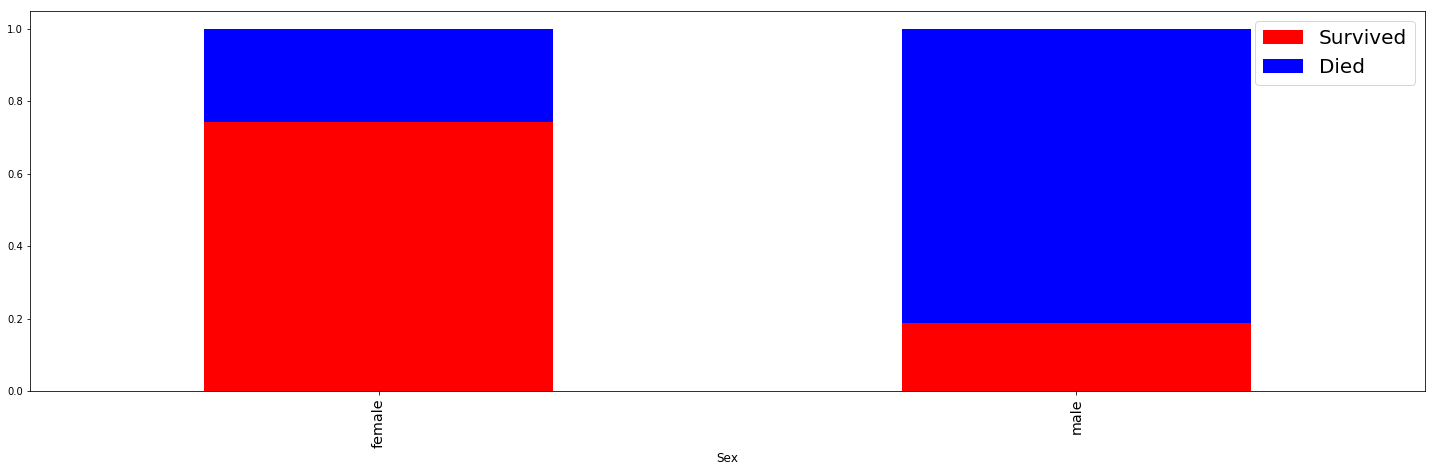

In [19]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=[ 'r','b']);

In [20]:
data.groupby('Sex').agg('mean')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.929936,0.694268,0.649682,44.479818,0.257962
male,454.147314,0.188908,2.389948,30.140676,0.429809,0.235702,25.523893,0.811092


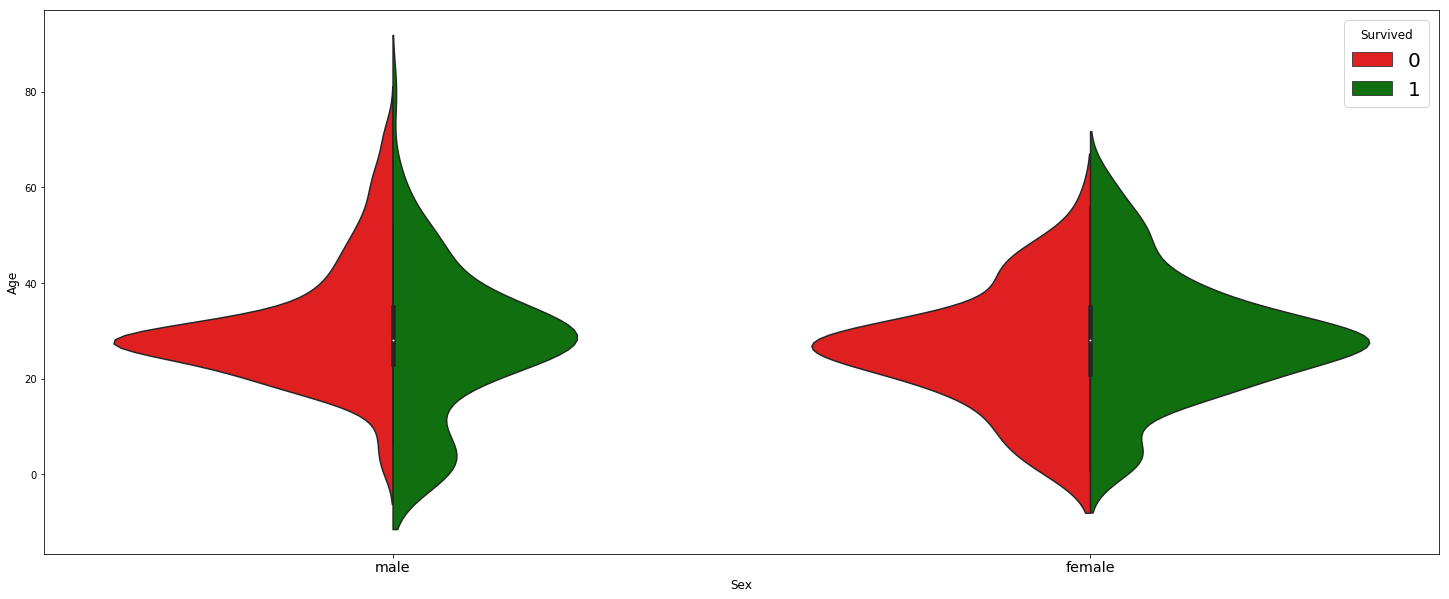

In [31]:
plt.figure(figsize=(25,10))
sns.violinplot(x='Sex',y='Age',data=data,hue='Survived',split=True,palette={0: "r", 1: "g"},scale='area')

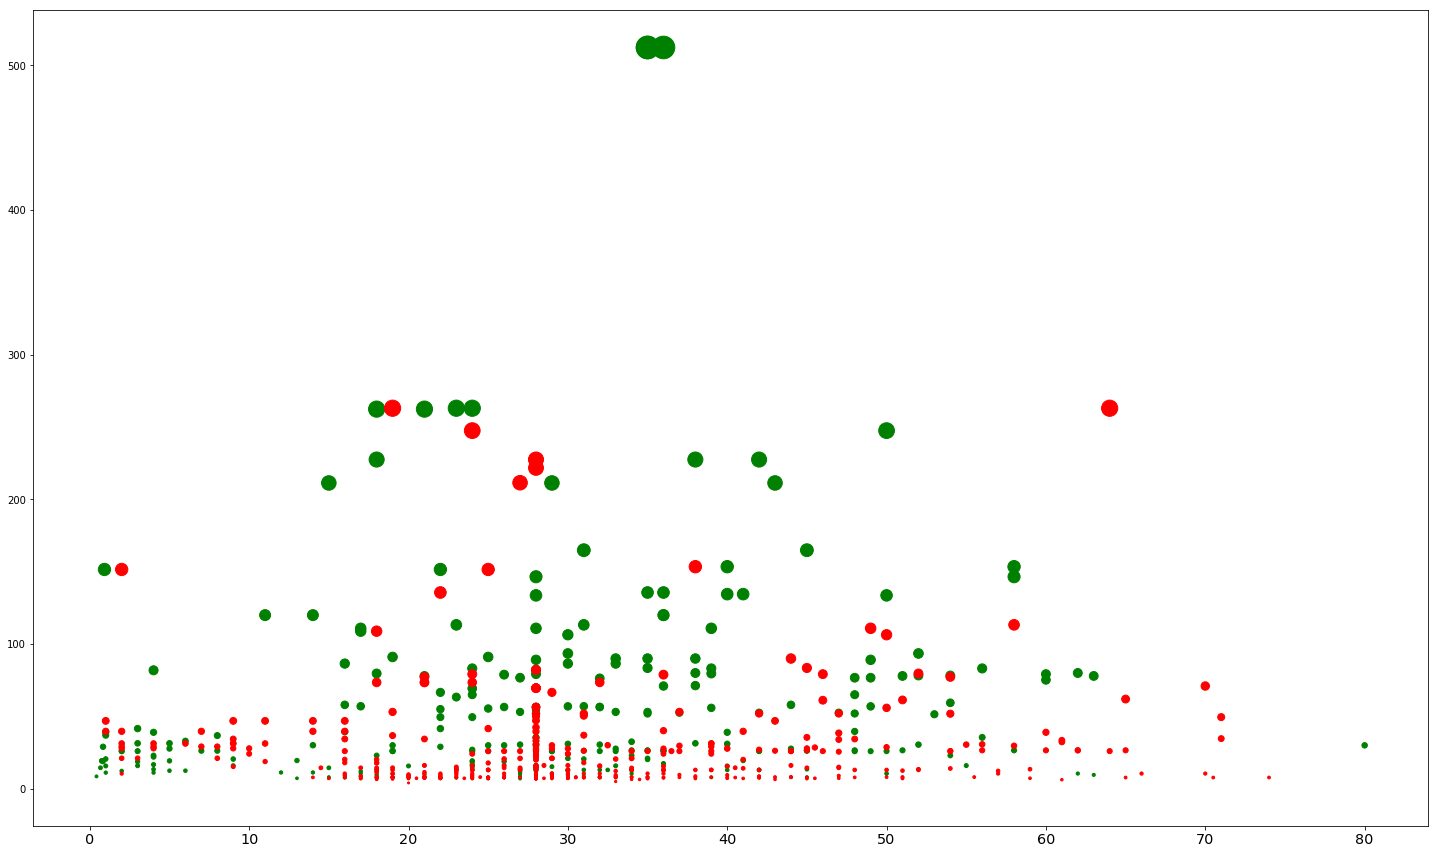

In [34]:
plt.figure(figsize=(25, 15))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare'])

In [37]:
data.groupby('Pclass').mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

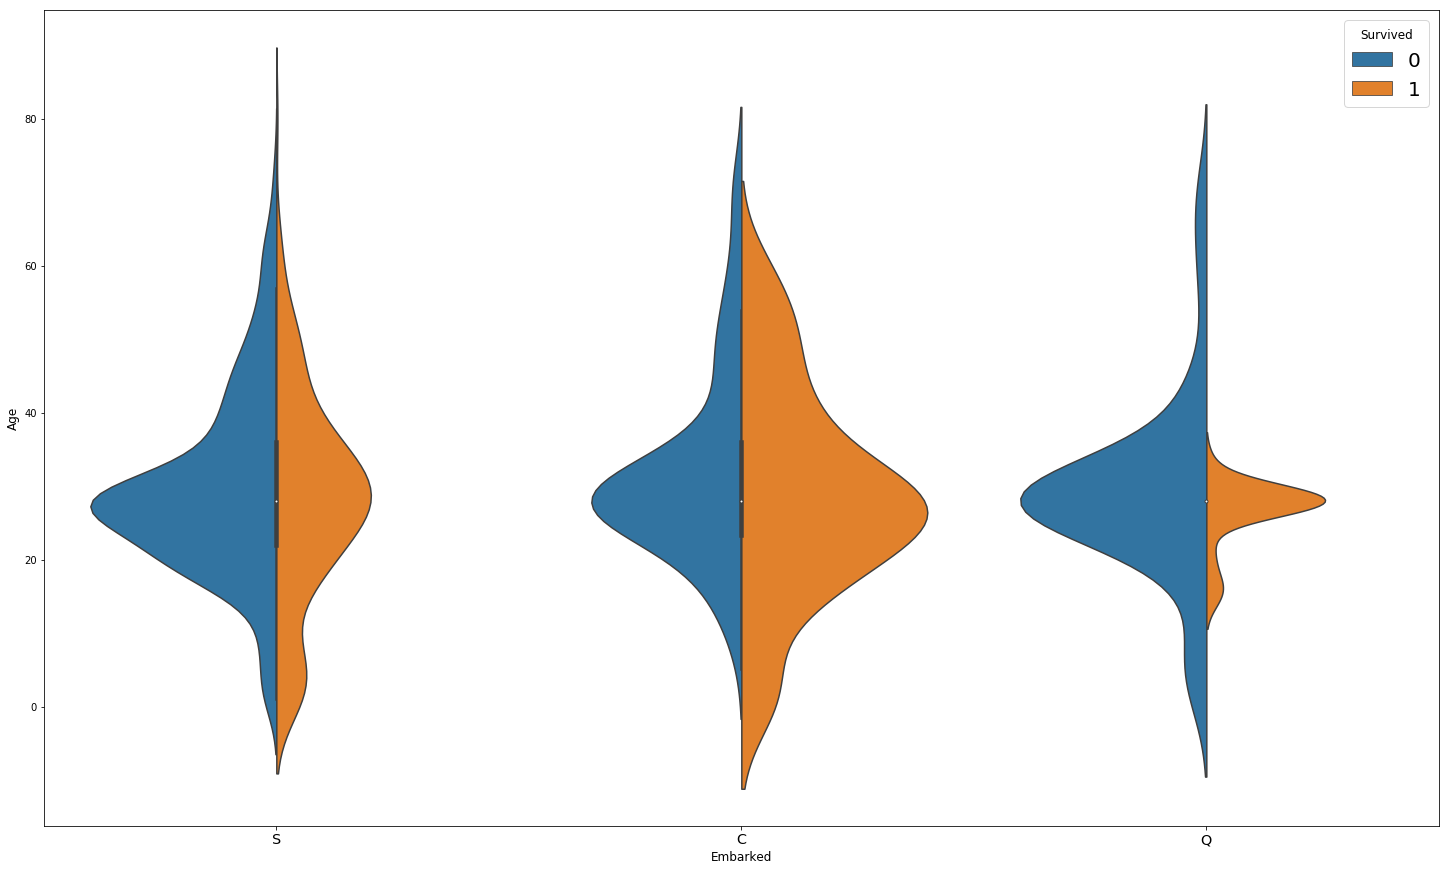

In [43]:
plt.figure(figsize=(25,15))
sns.violinplot(x='Embarked',y='Age',hue='Survived',split=True,data=data,scale='count')

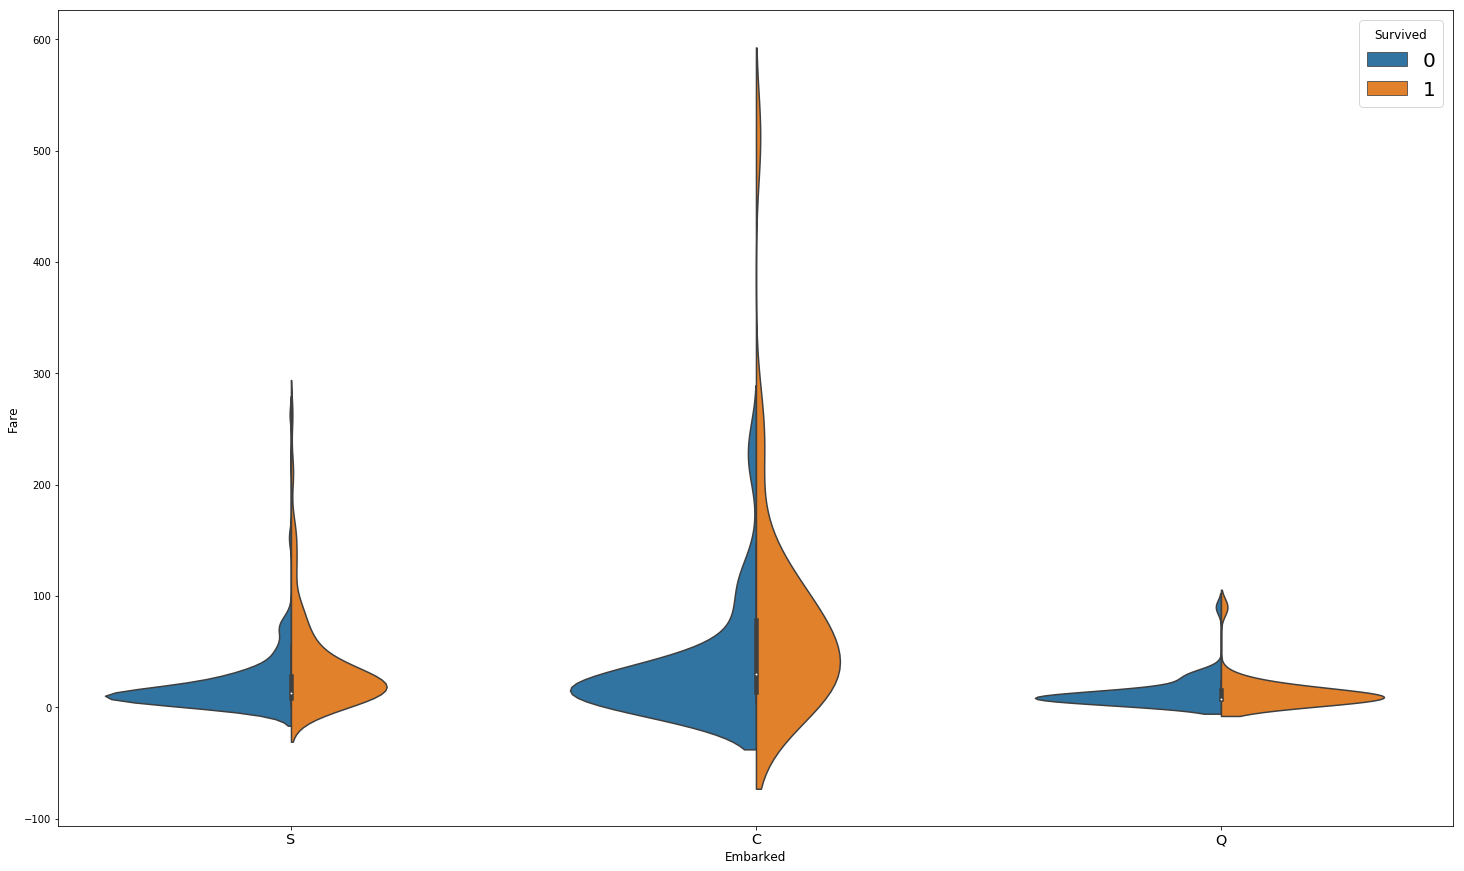

In [45]:
plt.figure(figsize=(25,15))
sns.violinplot(x='Embarked',y='Fare',hue='Survived',split=True,data=data)

In [46]:
def combine():
    train=pd.read_csv('train.csv')
    test=pd.read_csv('test.csv')
    y=train['Survived']
    train.drop('Survived',axis=1,inplace=True)
    comb=train.append(test)
    comb.reset_index(inplace=True)
    comb.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return comb

In [77]:
comb=combine()

In [78]:
comb.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
comb.shape

(1309, 10)

In [80]:
titles=set()
for i in data['Name']:
    titles.add(i.split(',')[1].split('.')[0].strip())

In [81]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [82]:
tit = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    comb['Title'] = comb['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    comb['Title'] = comb.Title.map(tit)
    return comb

In [83]:
comb=get_titles()

In [84]:
comb.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [86]:
comb[comb['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [87]:
grouped_train = comb.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [88]:
grouped_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


In [89]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    comb['Age'] = comb.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return comb

In [90]:
comb=process_age()

In [109]:
comb.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [107]:
def process_names():
    global comb
    titles_dummies = pd.get_dummies(comb['Title'], prefix='Title')
    comb = pd.concat([comb, titles_dummies], axis=1)
    
    # removing the title variable
    comb.drop('Title', axis=1, inplace=True)
    return comb

In [108]:
comb=process_names()

In [110]:
comb.shape

(1309, 15)

In [111]:
comb.Fare.fillna(comb.iloc[:891].Fare.mean(),inplace=True)

In [115]:
comb.iloc[:891].isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Title_Officer      0
Title_Royalty      0
dtype: int64

In [119]:
data.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Died
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69,168
Q,77,77,77,77,77,77,77,77,77,77,4,77
S,644,644,644,644,644,644,644,644,644,644,129,644


In [120]:
comb.Embarked.fillna('S',inplace=True)

In [123]:
embarked_dummies = pd.get_dummies(comb['Embarked'], prefix='Embarked')
comb = pd.concat([comb, embarked_dummies], axis=1)
comb.drop('Embarked', axis=1, inplace=True)

In [124]:
comb.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [125]:
import xgboost as xgb

In [135]:
cabins=set()
for i in list(set(comb['Cabin'])):
    if i!=np.nan:
        cabins.add(str(i)[0])

In [137]:
cabins.remove('n')

In [138]:
cabins.add('U')

In [140]:
comb.Cabin.fillna('U', inplace=True)
comb['Cabin'] = comb['Cabin'].map(lambda c: c[0])

cabin_dummies = pd.get_dummies(comb['Cabin'], prefix='Cabin')    
comb = pd.concat([comb, cabin_dummies], axis=1)

comb.drop('Cabin', axis=1, inplace=True)

In [150]:
comb.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Fam
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,0,1,2
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1


In [142]:
comb['Sex']=comb['Sex'].map({'male':1,'female':0})

In [144]:
pclass=pd.get_dummies(comb['Pclass'],prefix="Pclass")
comb=pd.concat([comb,pclass],axis=1)
comb.drop('Pclass',axis=1,inplace=True)

In [148]:
comb.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [149]:
comb['Fam']=comb['Parch']+comb['SibSp']+1

In [180]:
comb.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Fam
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,0,1,2
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1


In [185]:
def process_ticket():
    global comb
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = list(map(lambda t : t.strip(), ticket))
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    comb['Ticket'] = comb['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(comb['Ticket'], prefix='Ticket')
    comb = pd.concat([comb, tickets_dummies], axis=1)
    comb.drop('Ticket', inplace=True, axis=1)
    return comb

In [186]:
comb=process_ticket()

In [188]:
comb.shape

(1309, 64)

In [196]:
comb.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
comb['Singleton'] = comb['Fam'].map(lambda s: 1 if s == 1 else 0)
comb['SmallFamily'] = comb['Fam'].map(lambda s: 1 if 2 <= s <= 4 else 0)
comb['LargeFamily'] = comb['Fam'].map(lambda s: 1 if 5 <= s else 0)

In [212]:
comb.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel


In [156]:
train=pd.read_csv('train.csv')
y=train['Survived']

In [213]:
X_train=comb[:891]
X_test=comb[891:]

In [215]:
comb.shape

(1309, 67)

In [214]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [192]:
rmf=RandomForestClassifier()

In [233]:
rmf.fit(X_train,y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [166]:
X_test.drop('Ticket',axis=1,inplace=True)

In [234]:
preds=rmf.predict(X_test)

In [240]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':preds})
submission.to_csv('round6.csv',index=False)

In [216]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf.fit(X_train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [217]:
clf.feature_importances_

array([  1.09733133e-01,   1.95407344e-01,   2.17381070e-02,
         1.56581524e-02,   1.70216442e-01,   9.99624313e-03,
         3.34433518e-02,   1.12977140e-01,   3.47319730e-02,
         6.54031673e-03,   9.71939113e-04,   1.31268169e-02,
         6.62415948e-03,   1.18081542e-02,   2.97049240e-03,
         7.00096648e-03,   8.48015929e-03,   6.10414813e-03,
         1.09181988e-02,   1.06512773e-03,   1.30362465e-03,
         3.71528175e-04,   2.31160979e-02,   1.94800412e-02,
         1.19686968e-02,   3.52573620e-02,   2.99297325e-02,
         0.00000000e+00,   5.70612687e-04,   3.27469736e-03,
         0.00000000e+00,   0.00000000e+00,   2.91091988e-05,
         2.29362222e-03,   3.13919970e-03,   6.93135957e-06,
         3.64681596e-04,   4.44747815e-04,   1.13804600e-05,
         9.61546401e-04,   0.00000000e+00,   6.86284178e-03,
         7.42142212e-04,   7.67840239e-06,   1.71133691e-04,
         0.00000000e+00,   3.08607138e-05,   3.17158661e-04,
         2.46341337e-05,

In [218]:
model=SelectFromModel(clf,prefit=True)
X_train_red=model.transform(X_train)

In [220]:
X_train_red.shape

(891, 14)

In [221]:
X_test_red=model.transform(X_test)
X_test_red.shape

(418, 14)

In [222]:
clf.fit(X_train_red,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [223]:
preds=clf.predict(X_test_red)
preds

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [227]:
parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

grid_search.fit(X_train, y)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
    
model = RandomForestClassifier(parameters)
model.fit(X_train,y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  1.0min finished


Best score: 0.835016835016835
Best parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}


ValueError: n_estimators must be an integer, got <class 'dict'>.

In [228]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            n_estimators={'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10},
            n_jobs=1, oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [232]:
rmf=grid_search.best_estimator_

In [236]:
xg=xgb.XGBClassifier()

In [237]:
xg.fit(X_train,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [238]:
preds=xg.predict(X_test)

In [239]:
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [241]:
xg.score(X_train,y)

0.8843995510662177

In [243]:
model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

In [244]:
model.fit(X_train,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [245]:
model.score(X_train,y)

0.89674523007856344

In [246]:
preds=xg.predict(X_test)

In [260]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':preds})
submission.to_csv('round8.csv',index=False)

In [248]:
comb.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [252]:
parameters_xg={
    'learning_rate': [0.05,0.1,0.3],
    'max_depth': [3,5,7,9],
    'gamma': [0,0.1,0.2],
    'min_child_weight': list(range(1,8,2)),
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

xg_grid=GridSearchCV(estimator=xg,param_grid=parameters_xg,cv=3,verbose=1,n_jobs=-1)

In [253]:
xg_grid.fit(X_train,y)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3888 out of 3888 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.05, 0.1, 0.3], 'max_depth': [3, 5, 7, 9], 'gamma': [0, 0.1, 0.2], 'min_child_weight': [1, 3, 5, 7], 'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [254]:
xg_grid.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 5,
 'subsample': 0.85}

In [255]:
best=xg_grid.best_estimator_

In [257]:
best.fit(X_train,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.85)

In [258]:
best.score(X_train,y)

0.90235690235690236

In [259]:
preds=best.predict(X_test)